<a href="https://colab.research.google.com/github/vini1lol/Harvardx/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
h = 1
sd = 1
n = 50

def gen_data(n,h,sd1,sd2):
  x1 = ss.norm.rvs(-h,sd1,n)
  y1 = ss.norm.rvs(0,sd1,n)
  x2 = ss.norm.rvs(h,sd2,n)
  y2 = ss.norm.rvs(0,sd2,n)
  return (x1,y1,x2,y2) 

In [0]:
(x1,y1,x2,y2) = gen_data(50,1,1,1.5)

In [0]:
(x1,y1,x2,y2) = gen_data(1000,1.5,1,1.5)

In [0]:
def plot_data(x1,y1,x2,y2):
  plt.figure()
  plt.plot(x1,y1, 'o', ms=2)
  plt.plot(x2,y2, 'o', ms=2)
  plt.xlabel("$X_1$")
  plt.ylabel("$X_2$")

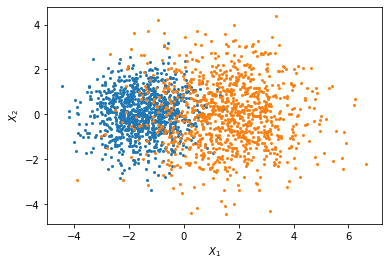

In [0]:
plot_data(x1,y1,x2,y2)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
clf = LogisticRegression()

In [0]:
X = np.vstack((np.vstack((x1,y1)).T, np.vstack((x2,y2)).T))

In [0]:
X.shape

(2000, 2)

In [0]:
n = 1000
y = np.hstack((np.repeat(1,n),np.repeat(2,n)))

In [0]:
y.shape

(2000,)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size =0.5, random_state=1)

In [0]:
X_train.shape

(1000, 2)

In [0]:
X_test.shape

(1000, 2)

In [0]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(X_test,y_test)

0.89

In [0]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.96397392, 0.03602608]])

In [0]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

In [0]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

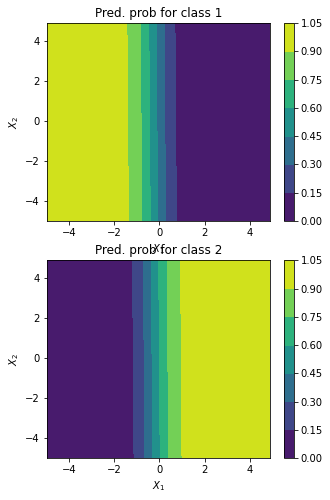

In [0]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");